Has to manually remove the extremly large baseline BMI in BG and BPBG data!!!(Did this with Excel)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

bp_df = pd.read_csv('Contextual_test_BPClass.csv')
bg_df = pd.read_csv('Contextual_test_BGClass.csv')
bpbg_df = pd.read_csv('Contextual_test_BPBGClass.csv')

## Table 1 - Inconsistent

In [3]:
print(bp_df.columns)
print(bg_df.columns)
print(bpbg_df.columns)

Index(['MaskId', 'Visit_num', 'baseline_age', 'female', 'race_whiteother',
       'edu_baseline_1', 'edu_baseline_2', 'edu_baseline_3', 'cvd_hx_baseline',
       'baseline_BMI', 'cigarett_baseline_1', 'state_code', 'action_code',
       'med_list', 'sbp_fb', 'cvdrisk_fb', 'state_code_cln', 'action_code_cln',
       'med_list_cln', 'sbp_fb_cln', 'cvdrisk_fb_cln'],
      dtype='object')
Index(['MaskId', 'Visit_num', 'baseline_age', 'female', 'race_whiteother',
       'edu_baseline_1', 'edu_baseline_2', 'edu_baseline_3', 'cvd_hx_baseline',
       'baseline_BMI', 'cigarett_baseline_1', 'state_code', 'action_code',
       'med_list', 'sbp_fb', 'hba1c_fb', 'cvdrisk_fb', 'state_code_cln',
       'action_code_cln', 'med_list_cln', 'sbp_fb_cln', 'hba1c_fb_cln',
       'cvdrisk_fb_cln'],
      dtype='object')
Index(['MaskId', 'Visit_num', 'baseline_age', 'female', 'race_whiteother',
       'edu_baseline_1', 'edu_baseline_2', 'edu_baseline_3', 'cvd_hx_baseline',
       'baseline_BMI', 'cigarett_b

In [4]:
def check_inconsistent_data(df, flag):

    print()
    print('---{}---'.format(flag))
    df_len = df.shape[0]
    print('df.shape: ', df.shape)

    # select rows with inconsistent `action_code` and `action_code_cln`
    inconsistent_df = df.loc[df['action_code'] != df['action_code_cln']]
    print('inconsistent_df.shape: ', inconsistent_df.shape)

    inconsistent_df_len = inconsistent_df.shape[0]

    print('{:.2f}'.format(inconsistent_df_len / df_len * 100))

    if flag == 'bp':
        sbp_fb_mean, sbp_fb_std = inconsistent_df['sbp_fb'].mean(), inconsistent_df['sbp_fb'].std()
        sbp_fb_cln_mean, sbp_fb_cln_std = inconsistent_df['sbp_fb_cln'].mean(), inconsistent_df['sbp_fb_cln'].std()
        sbp_fb_140 = inconsistent_df.loc[inconsistent_df['sbp_fb'] >= 125].shape[0]
        sbp_fb_140_cln = inconsistent_df.loc[inconsistent_df['sbp_fb_cln'] >= 125].shape[0]
        print('{:.2f}[{:.2f}]\t{:.2f}[{:.2f}]'.format(sbp_fb_mean, sbp_fb_std, sbp_fb_cln_mean, sbp_fb_cln_std))
        print('{:.2f}\t{:.2f}'.format(sbp_fb_140/inconsistent_df_len*100, sbp_fb_140_cln/inconsistent_df_len*100))

        cvdrisk_fb_mean, cvdrisk_fb_std = inconsistent_df['cvdrisk_fb'].mean(), inconsistent_df['cvdrisk_fb'].std()
        cvdrisk_fb_cln_mean, cvdrisk_fb_cln_std = inconsistent_df['cvdrisk_fb_cln'].mean(), inconsistent_df['cvdrisk_fb_cln'].std()
        cvdrisk_fb_20 = inconsistent_df.loc[inconsistent_df['cvdrisk_fb'] >= 0.2].shape[0]
        cvdrisk_fb_20_cln = inconsistent_df.loc[inconsistent_df['cvdrisk_fb_cln'] >= 0.2].shape[0]
        print('{:.2f}[{:.2f}]\t{:.2f}[{:.2f}]'.format(cvdrisk_fb_mean, cvdrisk_fb_std, cvdrisk_fb_cln_mean, cvdrisk_fb_cln_std))
        print('{:.2f}\t{:.2f}'.format(cvdrisk_fb_20/inconsistent_df_len*100, cvdrisk_fb_20_cln/inconsistent_df_len*100))

    
    if flag == 'bg':
        hba1c_fb_mean, hba1c_fb_std = inconsistent_df['hba1c_fb'].mean(), inconsistent_df['hba1c_fb'].std()
        hba1c_fb_cln_mean, hba1c_fb_cln_std = inconsistent_df['hba1c_fb_cln'].mean(), inconsistent_df['hba1c_fb_cln'].std()
        hba1c_fb_8 = inconsistent_df.loc[inconsistent_df['hba1c_fb'] >= 7.5].shape[0]
        hba1c_fb_8_clb = inconsistent_df.loc[inconsistent_df['hba1c_fb_cln'] >= 7.5].shape[0]
        print('{:.2f}[{:.2f}]\t{:.2f}[{:.2f}]'.format(hba1c_fb_mean, hba1c_fb_std, hba1c_fb_cln_mean, hba1c_fb_cln_std))
        print('{:.2f}\t{:.2f}'.format(hba1c_fb_8/inconsistent_df_len*100, hba1c_fb_8_clb/inconsistent_df_len*100))

        cvdrisk_fb_mean, cvdrisk_fb_std = inconsistent_df['cvdrisk_fb'].mean(), inconsistent_df['cvdrisk_fb'].std()
        cvdrisk_fb_cln_mean, cvdrisk_fb_cln_std = inconsistent_df['cvdrisk_fb_cln'].mean(), inconsistent_df['cvdrisk_fb_cln'].std()
        cvdrisk_fb_20 = inconsistent_df.loc[inconsistent_df['cvdrisk_fb'] >= 0.2].shape[0]
        cvdrisk_fb_20_cln = inconsistent_df.loc[inconsistent_df['cvdrisk_fb_cln'] >= 0.2].shape[0]
        print('{:.2f}[{:.2f}]\t{:.2f}[{:.2f}]'.format(cvdrisk_fb_mean, cvdrisk_fb_std, cvdrisk_fb_cln_mean, cvdrisk_fb_cln_std))
        print('{:.2f}\t{:.2f}'.format(cvdrisk_fb_20/inconsistent_df_len*100, cvdrisk_fb_20_cln/inconsistent_df_len*100))

    if flag == 'bpbg':

        sbp_fb_mean, sbp_fb_std = inconsistent_df['sbp_fb'].mean(), inconsistent_df['sbp_fb'].std()
        sbp_fb_cln_mean, sbp_fb_cln_std = inconsistent_df['sbp_fb_cln'].mean(), inconsistent_df['sbp_fb_cln'].std()
        sbp_fb_140 = inconsistent_df.loc[inconsistent_df['sbp_fb'] >= 125].shape[0]
        sbp_fb_140_cln = inconsistent_df.loc[inconsistent_df['sbp_fb_cln'] >= 125].shape[0]
        print('{:.2f}[{:.2f}]\t{:.2f}[{:.2f}]'.format(sbp_fb_mean, sbp_fb_std, sbp_fb_cln_mean, sbp_fb_cln_std))
        print('{:.2f}\t{:.2f}'.format(sbp_fb_140/inconsistent_df_len*100, sbp_fb_140_cln/inconsistent_df_len*100))

        hba1c_fb_mean, hba1c_fb_std = inconsistent_df['hba1c_fb'].mean(), inconsistent_df['hba1c_fb'].std()
        hba1c_fb_cln_mean, hba1c_fb_cln_std = inconsistent_df['hba1c_fb_cln'].mean(), inconsistent_df['hba1c_fb_cln'].std()
        hba1c_fb_8 = inconsistent_df.loc[inconsistent_df['hba1c_fb'] >= 7.5].shape[0]
        hba1c_fb_8_clb = inconsistent_df.loc[inconsistent_df['hba1c_fb_cln'] >= 7.5].shape[0]
        print('{:.2f}[{:.2f}]\t{:.2f}[{:.2f}]'.format(hba1c_fb_mean, hba1c_fb_std, hba1c_fb_cln_mean, hba1c_fb_cln_std))
        print('{:.2f}\t{:.2f}'.format(hba1c_fb_8/inconsistent_df_len*100, hba1c_fb_8_clb/inconsistent_df_len*100))

        cvdrisk_fb_mean, cvdrisk_fb_std = inconsistent_df['cvdrisk_fb'].mean(), inconsistent_df['cvdrisk_fb'].std()
        cvdrisk_fb_cln_mean, cvdrisk_fb_cln_std = inconsistent_df['cvdrisk_fb_cln'].mean(), inconsistent_df['cvdrisk_fb_cln'].std()
        cvdrisk_fb_20 = inconsistent_df.loc[inconsistent_df['cvdrisk_fb'] >= 0.2].shape[0]
        cvdrisk_fb_20_cln = inconsistent_df.loc[inconsistent_df['cvdrisk_fb_cln'] >= 0.2].shape[0]
        print('{:.2f}[{:.2f}]\t{:.2f}[{:.2f}]'.format(cvdrisk_fb_mean, cvdrisk_fb_std, cvdrisk_fb_cln_mean, cvdrisk_fb_cln_std))
        print('{:.2f}\t{:.2f}'.format(cvdrisk_fb_20/inconsistent_df_len*100, cvdrisk_fb_20_cln/inconsistent_df_len*100))    
    
check_inconsistent_data(bp_df, 'bp')
check_inconsistent_data(bg_df, 'bg')
check_inconsistent_data(bpbg_df, 'bpbg')


---bp---
df.shape:  (87320, 21)
inconsistent_df.shape:  (65549, 21)
75.07
125.73[3.01]	125.61[2.65]
59.51	58.03
0.20[0.12]	0.21[0.12]
41.14	45.23

---bg---
df.shape:  (161440, 23)
inconsistent_df.shape:  (158670, 23)
98.28
6.99[0.15]	7.10[0.27]
0.06	6.12
0.23[0.12]	0.23[0.12]
50.01	52.54

---bpbg---
df.shape:  (71860, 23)
inconsistent_df.shape:  (65449, 23)
91.08
124.07[2.18]	126.49[2.68]
31.64	71.00
7.58[0.18]	7.13[0.32]
65.35	12.38
0.21[0.12]	0.22[0.12]
43.46	47.65


## Table 2 - Demographics

In [8]:
def check_demographics(bp_df, bg_df, bpbg_df):


    # select rows with inconsistent `action_code` and `action_code_cln`
    bp_incons_df = bp_df.loc[bp_df['action_code'] != bp_df['action_code_cln']]
    bg_incons_df = bg_df.loc[bg_df['action_code'] != bg_df['action_code_cln']]
    bpbg_incons_df = bpbg_df.loc[bpbg_df['action_code'] != bpbg_df['action_code_cln']]

    bp_cons_df = bp_df.loc[bp_df['action_code'] == bp_df['action_code_cln']]
    bg_cons_df = bg_df.loc[bg_df['action_code'] == bg_df['action_code_cln']]
    bpbg_cons_df = bpbg_df.loc[bpbg_df['action_code'] == bpbg_df['action_code_cln']]

    print("No/Yes %")
    print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(
        bp_incons_df.shape[0]/bp_df.shape[0]*100, bp_cons_df.shape[0]/bp_df.shape[0]*100,
        bg_incons_df.shape[0]/bg_df.shape[0]*100, bg_cons_df.shape[0]/bg_df.shape[0]*100,
        bpbg_incons_df.shape[0]/bpbg_df.shape[0]*100, bpbg_cons_df.shape[0]/bpbg_df.shape[0]*100
    ))
    print()

    # print the average value of `baseline_age` in each consistent/inconsistent group
    print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(
        bp_incons_df['baseline_age'].mean(), bp_cons_df['baseline_age'].mean(),
        bg_incons_df['baseline_age'].mean(), bg_cons_df['baseline_age'].mean(),
        bpbg_incons_df['baseline_age'].mean(), bpbg_cons_df['baseline_age'].mean()
    ))

    # print the average value of `female` in each consistent/inconsistent group
    print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(
        bp_incons_df['female'].mean()*100, bp_cons_df['female'].mean()*100,
        bg_incons_df['female'].mean()*100, bg_cons_df['female'].mean()*100,
        bpbg_incons_df['female'].mean()*100, bpbg_cons_df['female'].mean()*100
    ))
    print()

    # print the average value of `race_whiteother` in each consistent/inconsistent group
    print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(
        bp_incons_df['race_whiteother'].mean()*100, bp_cons_df['race_whiteother'].mean()*100,
        bg_incons_df['race_whiteother'].mean()*100, bg_cons_df['race_whiteother'].mean()*100,
        bpbg_incons_df['race_whiteother'].mean()*100, bpbg_cons_df['race_whiteother'].mean()*100
    ))
      
    print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(
        (1-bp_incons_df['race_whiteother'].mean())*100, (1-bp_cons_df['race_whiteother'].mean())*100,
        (1-bg_incons_df['race_whiteother'].mean())*100, (1-bg_cons_df['race_whiteother'].mean())*100,
        (1-bpbg_incons_df['race_whiteother'].mean())*100, (1-bpbg_cons_df['race_whiteother'].mean())*100
    ))

    # print the average value of `cvd_hx_baseline` in each consistent/inconsistent group
    print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(
        bp_incons_df['cvd_hx_baseline'].mean()*100, bp_cons_df['cvd_hx_baseline'].mean()*100,
        bg_incons_df['cvd_hx_baseline'].mean()*100, bg_cons_df['cvd_hx_baseline'].mean()*100,
        bpbg_incons_df['cvd_hx_baseline'].mean()*100, bpbg_cons_df['cvd_hx_baseline'].mean()*100
    ))

    # print the average value of `cigarett_baseline_1` in each consistent/inconsistent group
    print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(
        bp_incons_df['cigarett_baseline_1'].mean()*100, bp_cons_df['cigarett_baseline_1'].mean()*100,
        bg_incons_df['cigarett_baseline_1'].mean()*100, bg_cons_df['cigarett_baseline_1'].mean()*100,
        bpbg_incons_df['cigarett_baseline_1'].mean()*100, bpbg_cons_df['cigarett_baseline_1'].mean()*100
    ))

    # print the average value of `baseline_BMI` in each consistent/inconsistent group
    print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(
        bp_incons_df['baseline_BMI'].mean(), bp_cons_df['baseline_BMI'].mean(),
        bg_incons_df['baseline_BMI'].mean(), bg_cons_df['baseline_BMI'].mean(),
        bpbg_incons_df['baseline_BMI'].mean(), bpbg_cons_df['baseline_BMI'].mean()
    ))

check_demographics(bp_df, bg_df, bpbg_df)

No/Yes %
75.07	24.93	98.28	1.72	91.08	8.92

62.69	62.48	63.03	62.00	62.89	63.21
47.11	48.67	36.39	43.14	46.07	45.03

77.42	76.01	80.10	82.27	75.98	73.76
22.58	23.99	19.90	17.73	24.02	26.24
34.05	32.14	35.67	34.69	33.55	35.30
13.13	14.03	14.49	13.75	13.54	14.05
32.15	31.84	31.98	32.77	31.80	32.35


## Table 4 - Check Subgroup

In [42]:
def check_feedback(df_sub, flag):
    res = []
    res.append(df_sub.shape[0])
    
    if flag == 'bp':
        c2 = "{:.2f}[{:.2f}]".format(df_sub['sbp_fb'].mean(), df_sub['sbp_fb'].std())
        res.append(c2)
        c3 = "{:.2f}[{:.2f}]".format(df_sub['sbp_fb_cln'].mean(), df_sub['sbp_fb_cln'].std())
        res.append(c3)
        sbp_rel = df_sub['sbp_fb'] - df_sub['sbp_fb_cln']
        c4 = "{:.2f}[{:.2f}]".format(sbp_rel.mean(), sbp_rel.std())
        res.append(c4)

        c5 = "{:.2f}[{:.2f}]".format(df_sub['cvdrisk_fb'].mean(), df_sub['cvdrisk_fb'].std())
        res.append(c5)
        c6 = "{:.2f}[{:.2f}]".format(df_sub['cvdrisk_fb_cln'].mean(), df_sub['cvdrisk_fb_cln'].std())
        res.append(c6)
        cvdrisk_rel = df_sub['cvdrisk_fb'] - df_sub['cvdrisk_fb_cln']
        c7 = "{:.2f}[{:.2f}]".format(cvdrisk_rel.mean(), cvdrisk_rel.std())
        res.append(c7)

    if flag == 'bg':
        c5 = "{:.2f}[{:.2f}]".format(df_sub['hba1c_fb'].mean(), df_sub['hba1c_fb'].std())
        res.append(c5)
        c6 = "{:.2f}[{:.2f}]".format(df_sub['hba1c_fb_cln'].mean(), df_sub['hba1c_fb_cln'].std())
        res.append(c6)
        hba1c_rel = df_sub['hba1c_fb'] - df_sub['hba1c_fb_cln']
        c7 = "{:.2f}[{:.2f}]".format(hba1c_rel.mean(), hba1c_rel.std())
        res.append(c7)

        c5 = "{:.2f}[{:.2f}]".format(df_sub['cvdrisk_fb'].mean(), df_sub['cvdrisk_fb'].std())
        res.append(c5)
        c6 = "{:.2f}[{:.2f}]".format(df_sub['cvdrisk_fb_cln'].mean(), df_sub['cvdrisk_fb_cln'].std())
        res.append(c6)
        cvdrisk_rel = df_sub['cvdrisk_fb'] - df_sub['cvdrisk_fb_cln']
        c7 = "{:.2f}[{:.2f}]".format(cvdrisk_rel.mean(), cvdrisk_rel.std())
        res.append(c7)
    
    if flag == 'bpbg':
        c2 = "{:.2f}[{:.2f}]".format(df_sub['sbp_fb'].mean(), df_sub['sbp_fb'].std())
        res.append(c2)
        c3 = "{:.2f}[{:.2f}]".format(df_sub['sbp_fb_cln'].mean(), df_sub['sbp_fb_cln'].std())
        res.append(c3)
        sbp_rel = df_sub['sbp_fb'] - df_sub['sbp_fb_cln']
        c4 = "{:.2f}[{:.2f}]".format(sbp_rel.mean(), sbp_rel.std())
        res.append(c4)

        c5 = "{:.2f}[{:.2f}]".format(df_sub['hba1c_fb'].mean(), df_sub['hba1c_fb'].std())
        res.append(c5)
        c6 = "{:.2f}[{:.2f}]".format(df_sub['hba1c_fb_cln'].mean(), df_sub['hba1c_fb_cln'].std())
        res.append(c6)
        hba1c_rel = df_sub['hba1c_fb'] - df_sub['hba1c_fb_cln']
        c7 = "{:.2f}[{:.2f}]".format(hba1c_rel.mean(), hba1c_rel.std())
        res.append(c7)                

        c5 = "{:.2f}[{:.2f}]".format(df_sub['cvdrisk_fb'].mean(), df_sub['cvdrisk_fb'].std())
        res.append(c5)
        c6 = "{:.2f}[{:.2f}]".format(df_sub['cvdrisk_fb_cln'].mean(), df_sub['cvdrisk_fb_cln'].std())
        res.append(c6)
        cvdrisk_rel = df_sub['cvdrisk_fb'] - df_sub['cvdrisk_fb_cln']
        c7 = "{:.2f}[{:.2f}]".format(cvdrisk_rel.mean(), cvdrisk_rel.std())
        res.append(c7)
    
    # print values in res in a row
    print('\t'.join(map(str, res)))

def check_subgroup(df, flag):

    print()
    print('---{}---'.format(flag))
    df_len = df.shape[0]
    print('df.shape: ', df.shape)

    df_sub = df.loc[df['baseline_age'] > 60]
    # print('age>60:')
    check_feedback(df_sub, flag)

    df_sub = df.loc[df['baseline_age'] <= 60]
    # print('age<=60:')
    check_feedback(df_sub, flag)

    df_sub = df.loc[df['female'] == 1]
    # print('female:')
    check_feedback(df_sub, flag)

    df_sub = df.loc[df['female'] == 0]
    # print('male:')
    check_feedback(df_sub, flag)    

    df_sub = df.loc[df['race_whiteother'] == 1]
    check_feedback(df_sub, flag)

    df_sub = df.loc[df['race_whiteother'] == 0]
    check_feedback(df_sub, flag)    

    df_sub = df.loc[df['cvd_hx_baseline'] == 1]
    check_feedback(df_sub, flag)

    df_sub = df.loc[df['cvd_hx_baseline'] == 0]
    check_feedback(df_sub, flag)   

    df_sub = df.loc[df['cigarett_baseline_1'] == 1]
    check_feedback(df_sub, flag)

    df_sub = df.loc[df['cigarett_baseline_1'] == 0]
    check_feedback(df_sub, flag)      

    df_sub = df.loc[df['baseline_BMI'] >= 25]
    check_feedback(df_sub, flag)


check_subgroup(bp_df, 'bp')
check_subgroup(bg_df, 'bg')
check_subgroup(bpbg_df, 'bpbg')


---bp---
df.shape:  (87320, 21)
52400	126.85[2.89]	126.74[2.64]	0.11[2.96]	0.25[0.12]	0.26[0.12]	-0.02[0.05]
34920	125.16[2.82]	125.09[2.56]	0.07[2.96]	0.13[0.06]	0.14[0.07]	-0.01[0.03]
41480	126.47[2.99]	126.37[2.70]	0.10[2.95]	0.14[0.08]	0.16[0.09]	-0.01[0.03]
45840	125.91[2.95]	125.82[2.73]	0.08[2.97]	0.25[0.12]	0.27[0.13]	-0.02[0.05]
67300	125.35[2.58]	125.31[2.34]	0.04[2.96]	0.19[0.11]	0.21[0.12]	-0.02[0.04]
20020	128.93[2.56]	128.68[2.33]	0.26[2.97]	0.22[0.13]	0.24[0.13]	-0.02[0.04]
29320	126.04[3.03]	125.97[2.76]	0.06[2.94]	0.21[0.12]	0.23[0.13]	-0.02[0.04]
58000	126.24[2.95]	126.14[2.72]	0.10[2.97]	0.19[0.11]	0.21[0.11]	-0.02[0.04]
11660	126.00[2.95]	126.01[2.71]	-0.01[2.96]	0.27[0.13]	0.29[0.13]	-0.02[0.05]
75660	126.20[2.98]	126.09[2.73]	0.11[2.96]	0.19[0.11]	0.20[0.11]	-0.02[0.04]
79180	126.13[2.98]	126.00[2.73]	0.13[2.96]	0.20[0.11]	0.21[0.12]	-0.02[0.04]

---bg---
df.shape:  (161440, 23)
100860	6.93[0.13]	7.04[0.26]	-0.12[0.23]	0.28[0.12]	0.29[0.12]	-0.01[0.01]
60580	7.09

## Fig 1 2 3 - Med Class Combo Frequency plot


---bp---


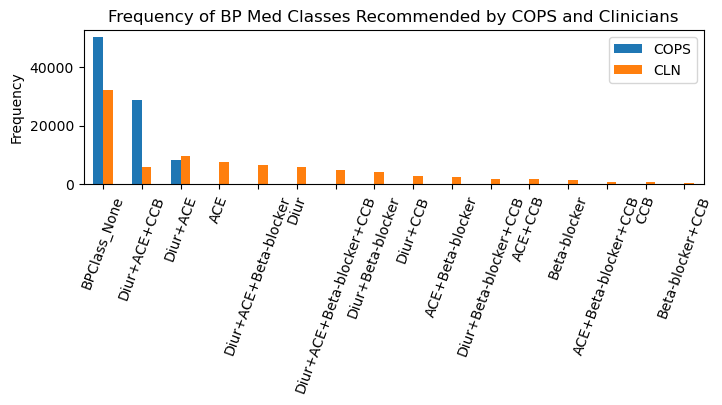


---bg---


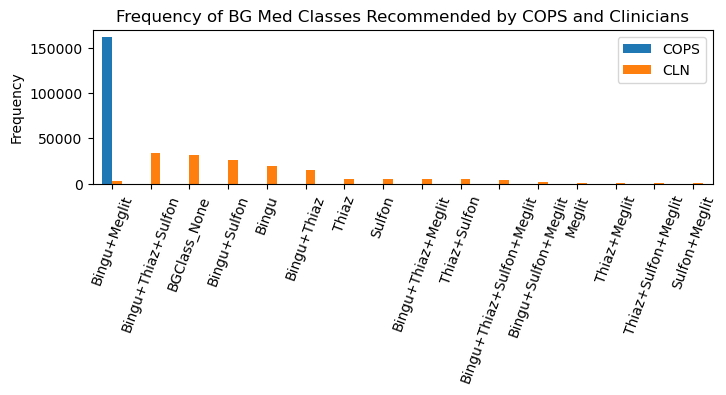


---bpbg---


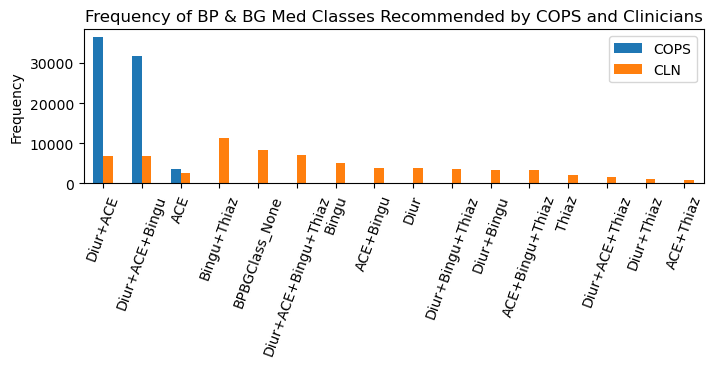

In [63]:
# use bar chart to show the frequency of med_list Column for COPS and Clinicians
import matplotlib.pyplot as plt
import seaborn as sns

def plot_med_list(df, flag):
    
    print()
    print('---{}---'.format(flag))

    # get the frequency count of each unique value in med_list Column in bp_df
    med_COPS = df['med_list'].value_counts()
    med_CLN = df['med_list_cln'].value_counts()

    # merge the two series into a dataframe
    med_df = pd.concat([med_COPS, med_CLN], axis=1)
    med_df.columns = ['COPS', 'CLN']
    # fill the NaN with 0
    med_df = med_df.fillna(0)
    # print(med_df)

    # plot the bar chart, one bar for COPS, one bar for CLN, x-axis is the index, y-axis is the frequency
    med_df.plot.bar(figsize=(8,2))
    if flag == 'bp':
        plt.title('Frequency of BP Med Classes Recommended by COPS and Clinicians')
    if flag == 'bg':
        plt.title('Frequency of BG Med Classes Recommended by COPS and Clinicians')
    if flag == 'bpbg':
        plt.title('Frequency of BP & BG Med Classes Recommended by COPS and Clinicians')

    # plt.xlabel('med_list')
    # rotate x-axis label
    plt.xticks(rotation=70)
    plt.ylabel('Frequency')
    plt.show()
    

plot_med_list(bp_df, 'bp')
plot_med_list(bg_df, 'bg')
plot_med_list(bpbg_df, 'bpbg')

## Fig 1 2 3 - Med Class Frequency plot


---bp---
med_cops:  {'Diur': 37147, 'ACE': 37147, 'CCB': 28788, 'BPClass_None': 50173}
med_cln:  {'ACE': 38930, 'Diur': 40769, 'CCB': 18326, 'BPClass_None': 32061, 'Beta-blocker': 21787}
                 COPS      CLN
Diur          37147.0  40769.0
ACE           37147.0  38930.0
CCB           28788.0  18326.0
BPClass_None  50173.0  32061.0
Beta-blocker      0.0  21787.0


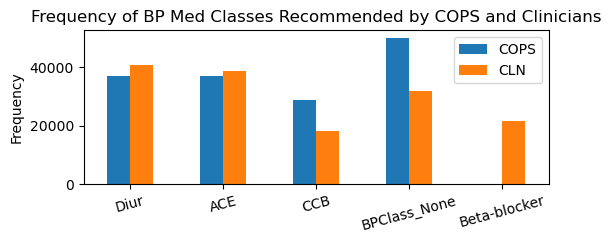


---bg---
med_cops:  {'Bingu': 161440, 'Meglit': 161440}
med_cln:  {'BGClass_None': 32183, 'Bingu': 109584, 'Thiaz': 72235, 'Sulfon': 78281, 'Meglit': 17287}
                  COPS       CLN
Bingu         161440.0  109584.0
Meglit        161440.0   17287.0
BGClass_None       0.0   32183.0
Thiaz              0.0   72235.0
Sulfon             0.0   78281.0


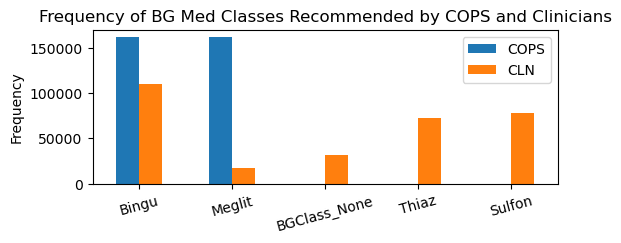


---bpbg---
med_cops:  {'Diur': 68269, 'ACE': 71860, 'Bingu': 31711}
med_cln:  {'ACE': 32740, 'Diur': 34460, 'Bingu': 44629, 'Thiaz': 31279, 'BPBGClass_None': 8318}
                   COPS      CLN
Diur            68269.0  34460.0
ACE             71860.0  32740.0
Bingu           31711.0  44629.0
Thiaz               0.0  31279.0
BPBGClass_None      0.0   8318.0


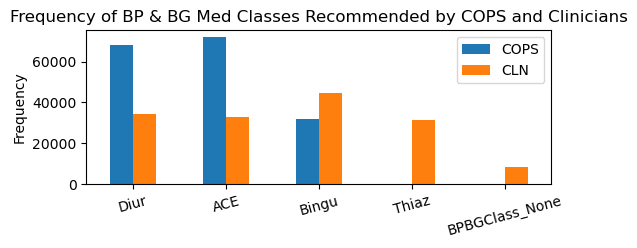

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_med_list(df, flag):
    
    print()
    print('---{}---'.format(flag))

    med_cops = dict()
    med_cln = dict()

    # loop through each row in df
    for i in range(df.shape[0]):
        row = df.iloc[i]
        m_cops = row['med_list'].split('+')
        m_cln = row['med_list_cln'].split('+')

        for m in m_cops:
            if m in med_cops:
                med_cops[m] += 1
            else:
                med_cops[m] = 1
        
        for m in m_cln:
            if m in med_cln:
                med_cln[m] += 1
            else:
                med_cln[m] = 1
    
    print('med_cops: ', med_cops)
    print('med_cln: ', med_cln)
    
    # build a dataframe from med_cops and med_cln
    med_df = pd.DataFrame([med_cops, med_cln])
    med_df = med_df.fillna(0)
    med_df = med_df.T
    med_df.columns = ['COPS', 'CLN']
    print(med_df)

    # plot the bar chart, one bar for COPS, one bar for CLN, x-axis is the index, y-axis is the frequency
    med_df.plot.bar(figsize=(6,2))
    if flag == 'bp':
        plt.title('Frequency of BP Med Classes Recommended by COPS and Clinicians')
    if flag == 'bg':
        plt.title('Frequency of BG Med Classes Recommended by COPS and Clinicians')
    if flag == 'bpbg':
        plt.title('Frequency of BP & BG Med Classes Recommended by COPS and Clinicians')

    plt.xticks(rotation=15)
    plt.ylabel('Frequency')
    plt.show()
    

plot_med_list(bp_df, 'bp')
plot_med_list(bg_df, 'bg')
plot_med_list(bpbg_df, 'bpbg')

## Fig 1 2 3 - Success Rate

### CVDRisk reduction

In [77]:
# get the success rate of CVDRisk reduction 
from tqdm import tqdm

def get_cvd_success_rate(df):

    success_rate = []

    # loop through each patient in the df
    for i in tqdm(range(100001, 110252)):
        df_patient = df[df['MaskId'] == i]

        if len(df_patient) == 0:
            continue
        
        su_ct = 0
        # loop through each visit of the patient, starting from the second visit
        for j in range(1, len(df_patient)):
            row = df_patient.iloc[j]
            prev_cvd = df_patient.iloc[j-1]['cvdrisk_fb']
            current_cvd = row['cvdrisk_fb']
            if current_cvd < prev_cvd:
                su_ct += 1
        
        success_rate.append(su_ct / (len(df_patient) - 1))
    
    return success_rate

bp_cvd_suc_rate = get_cvd_success_rate(bp_df)
bg_cvd_suc_rate = get_cvd_success_rate(bg_df)
bpbg_cvd_suc_rate = get_cvd_success_rate(bpbg_df)

print('bp_cvd_suc_rate: ', bp_cvd_suc_rate)
print('bg_cvd_suc_rate: ', bg_cvd_suc_rate)
print('bpbg_cvd_suc_rate: ', bpbg_cvd_suc_rate)

100%|██████████| 10251/10251 [00:17<00:00, 579.26it/s]


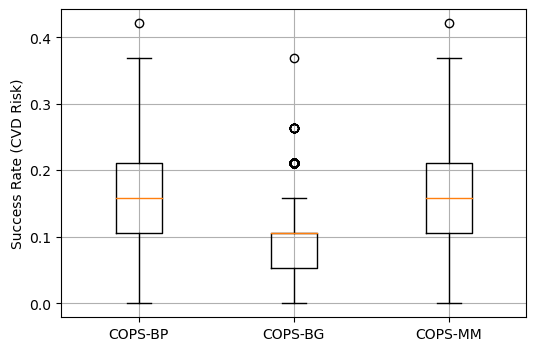

In [90]:
# plot the box plot of success rate, one for bp, one for bg, one for bpbg
import matplotlib.pyplot as plt

# Combine data into a list
data = [bp_cvd_suc_rate, bg_cvd_suc_rate, bpbg_cvd_suc_rate]

# set figure size
plt.figure(figsize=(6, 4))
# Plotting the box plot
plt.boxplot(data)

# Add labels to x-axis tick marks
plt.xticks([1, 2, 3], ['COPS-BP', 'COPS-BG', 'COPS-MM'])
plt.ylabel('Success Rate (CVD Risk)')
plt.grid()
plt.show()

### SBP

In [82]:
# get the success rate of CVDRisk reduction 
from tqdm import tqdm

def get_sbp_success_rate(df):

    success_rate = []

    # loop through each patient in the df
    for i in tqdm(range(100001, 110252)):
        df_patient = df[df['MaskId'] == i]

        if len(df_patient) == 0:
            continue
        
        su_ct = 0
        # loop through each visit of the patient
        for j in range(len(df_patient)):
            row = df_patient.iloc[j]
            current_sbp = row['sbp_fb']
            if current_sbp < 125 and current_sbp >= 110:
                su_ct += 1
        
        success_rate.append(su_ct / (len(df_patient)))
    
    return success_rate

bp_sbp_suc_rate = get_sbp_success_rate(bp_df)
bg_sbp_suc_rate = get_sbp_success_rate(bg_df)
bpbg_sbp_suc_rate = get_sbp_success_rate(bpbg_df)

print('bp_sbp_suc_rate: ', bp_sbp_suc_rate)
print('bg_sbp_suc_rate: ', bg_sbp_suc_rate)
print('bpbg_sbp_suc_rate: ', bpbg_sbp_suc_rate)

100%|██████████| 10251/10251 [00:12<00:00, 825.72it/s]

bp_sbp_suc_rate:  [0.25, 0.7, 0.0, 0.05, 0.15, 0.25, 0.4, 0.25, 0.35, 0.3, 0.2, 0.45, 0.45, 0.2, 0.6, 0.1, 1.0, 0.25, 0.2, 0.45, 0.55, 0.2, 0.1, 0.6, 0.4, 0.7, 0.4, 0.15, 0.6, 0.5, 0.0, 0.2, 0.35, 0.0, 0.3, 0.35, 0.25, 0.3, 0.05, 0.2, 0.25, 0.6, 0.4, 0.55, 0.0, 0.4, 0.6, 0.35, 0.25, 0.7, 0.0, 0.45, 0.3, 0.0, 0.45, 0.0, 0.2, 1.0, 0.0, 0.2, 0.15, 0.15, 0.5, 0.25, 0.0, 0.2, 0.15, 0.35, 0.75, 0.2, 0.25, 0.8, 0.75, 0.65, 0.35, 1.0, 0.4, 0.3, 0.15, 0.45, 0.1, 0.15, 0.0, 0.1, 0.25, 0.45, 0.35, 0.95, 0.5, 0.65, 0.0, 0.0, 0.4, 0.65, 0.0, 0.25, 0.45, 0.5, 0.1, 0.75, 0.35, 0.3, 0.35, 0.45, 0.7, 1.0, 0.45, 0.0, 0.4, 0.3, 0.45, 0.55, 0.25, 0.9, 0.4, 0.45, 0.45, 0.2, 0.4, 0.7, 0.1, 0.2, 0.75, 0.3, 1.0, 0.3, 0.2, 0.45, 0.7, 0.4, 0.5, 1.0, 0.3, 0.55, 0.4, 0.5, 0.2, 0.0, 0.5, 0.1, 0.45, 0.1, 0.05, 0.5, 0.5, 0.05, 0.45, 0.5, 0.4, 0.4, 0.95, 0.4, 0.0, 0.15, 0.25, 0.2, 0.0, 0.65, 0.2, 0.55, 0.2, 0.0, 0.2, 0.05, 0.15, 0.65, 0.1, 0.1, 0.35, 0.15, 0.0, 0.35, 0.35, 0.45, 0.15, 0.1, 0.2, 0.35, 0.55, 0.35, 0.55

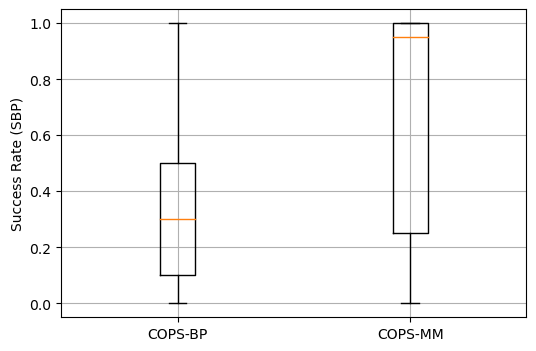

In [92]:
# plot the box plot of success rate, one for bp, one for bg, one for bpbg
import matplotlib.pyplot as plt

# Combine data into a list
data = [bp_sbp_suc_rate, bpbg_sbp_suc_rate]

plt.figure(figsize=(6, 4))
# Plotting the box plot
plt.boxplot(data)

# Add labels to x-axis tick marks
plt.xticks([1, 2], ['COPS-BP', 'COPS-MM'])
plt.ylabel('Success Rate (SBP)')
plt.grid()
plt.show()

### A1C

In [95]:
# get the success rate of CVDRisk reduction 
from tqdm import tqdm

def get_a1c_success_rate(df):

    success_rate = []

    # loop through each patient in the df
    for i in tqdm(range(100001, 110252)):
        df_patient = df[df['MaskId'] == i]

        if len(df_patient) == 0:
            continue
        
        su_ct = 0
        # loop through each visit of the patient
        for j in range(len(df_patient)):
            row = df_patient.iloc[j]
            current_a1c = row['hba1c_fb']
            if current_a1c <= 7.9  and current_a1c >= 7.0:
                su_ct += 1
        
        success_rate.append(su_ct / (len(df_patient)))
    
    return success_rate

bg_a1c_suc_rate = get_a1c_success_rate(bg_df)
bpbg_a1c_suc_rate = get_a1c_success_rate(bpbg_df)

print('bg_a1c_suc_rate: ', bg_a1c_suc_rate)
print('bpbg_a1c_suc_rate: ', bpbg_a1c_suc_rate)

100%|██████████| 10251/10251 [00:11<00:00, 906.47it/s]

bg_a1c_suc_rate:  [0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0

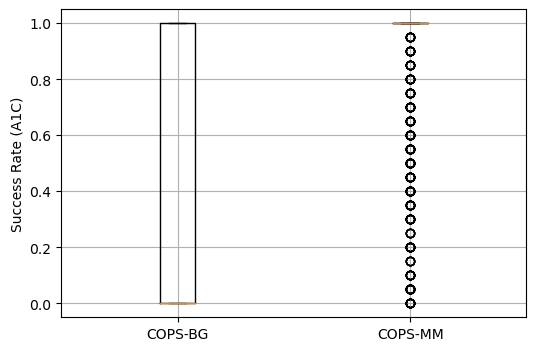

In [96]:
# plot the box plot of success rate, one for bp, one for bg, one for bpbg
import matplotlib.pyplot as plt

# Combine data into a list
data = [bg_a1c_suc_rate, bpbg_a1c_suc_rate]

plt.figure(figsize=(6, 4))
# Plotting the box plot
plt.boxplot(data)

# Add labels to x-axis tick marks
plt.xticks([1, 2], ['COPS-BG', 'COPS-MM'])
plt.ylabel('Success Rate (A1C)')
plt.grid()
plt.show()

## Med Frequency over Success and Failure data

In [98]:
# get the success and failed data by Clincian

def get_success_data(df):

    print('df.shape: ', df.shape)
    suc_data = []
    fail_data = []

    # loop through each row in the df
    for i in tqdm(range(df.shape[0])):
        row = df.iloc[i]
        if i%20 == 0: # first visit of each patient
            suc_data.append(row)
            fail_data.append(row)
        else:
            prev_row = df.iloc[i-1]
            if row['cvdrisk_fb_cln'] < prev_row['cvdrisk_fb_cln']:
                suc_data.append(row)
            else:
                fail_data.append(row)
    
    success_df = pd.DataFrame(suc_data)
    print('success_df.shape: ', success_df.shape)

    fail_df = pd.DataFrame(fail_data)
    print('fail_df.shape: ', fail_df.shape)

    return success_df, fail_df


bp_df_suc, bp_df_fail = get_success_data(bp_df)
bg_df_suc, bg_df_fail = get_success_data(bg_df)
bpbg_df_suc, bpbg_df_fail = get_success_data(bpbg_df)

df.shape:  (87320, 21)


100%|██████████| 87320/87320 [00:20<00:00, 4244.50it/s]


success_df.shape:  (28782, 21)
fail_df.shape:  (62904, 21)
df.shape:  (161440, 23)


100%|██████████| 161440/161440 [00:41<00:00, 3927.42it/s]


success_df.shape:  (43245, 23)
fail_df.shape:  (126267, 23)
df.shape:  (71860, 23)


100%|██████████| 71860/71860 [00:16<00:00, 4433.64it/s]


success_df.shape:  (25008, 23)
fail_df.shape:  (50445, 23)



---BP---
med_cops:  {'Diur': 14151, 'ACE': 14151, 'CCB': 9929, 'BPClass_None': 14631}
med_cln:  {'ACE': 17599, 'Diur': 17695, 'CCB': 8331, 'BPClass_None': 5237, 'Beta-blocker': 7864}


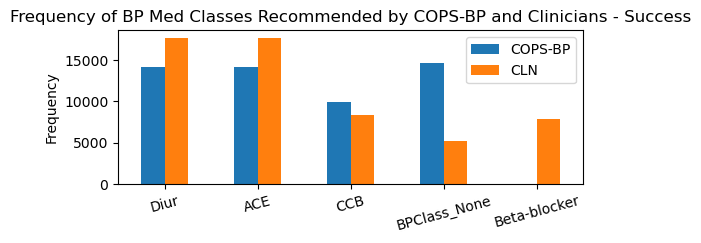


---BP---
med_cops:  {'Diur': 26933, 'ACE': 26933, 'CCB': 20829, 'BPClass_None': 35971}
med_cln:  {'ACE': 24317, 'Diur': 25424, 'CCB': 10983, 'BPClass_None': 27229, 'Beta-blocker': 15128}


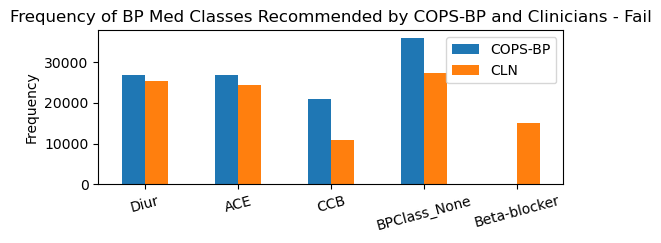

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_med_list_2(df, flag, dataset):
    
    print()
    print('---{}---'.format(flag))

    med_cops = dict()
    med_cln = dict()

    # loop through each row in df
    for i in range(df.shape[0]):
        row = df.iloc[i]
        m_cops = row['med_list'].split('+')
        m_cln = row['med_list_cln'].split('+')

        for m in m_cops:
            if m in med_cops:
                med_cops[m] += 1
            else:
                med_cops[m] = 1
        
        for m in m_cln:
            if m in med_cln:
                med_cln[m] += 1
            else:
                med_cln[m] = 1
    
    print('med_cops: ', med_cops)
    print('med_cln: ', med_cln)
    
    # build a dataframe from med_cops and med_cln
    med_df = pd.DataFrame([med_cops, med_cln])
    med_df = med_df.fillna(0)
    med_df = med_df.T
    med_df.columns = ['COPS-{}'.format(flag), 'CLN']
    # print(med_df)

    med_df.plot.bar(figsize=(6,2))
    plt.legend(loc='upper right')

    # plot the bar chart, one bar for COPS, one bar for CLN, x-axis is the index, y-axis is the frequency
    if flag == 'BP':
        plt.title('Frequency of BP Med Classes Recommended by COPS-{} and Clinicians - {}'.format(flag, dataset))
    if flag == 'BG':
        plt.title('Frequency of BG Med Classes Recommended by COPS-{} and Clinicians - {}'.format(flag, dataset))
    if flag == 'MM':
        plt.title('Frequency of BP & BG Med Classes Recommended by COPS-{} and Clinicians - {}'.format(flag, dataset))         

    plt.xticks(rotation=15)
    plt.ylabel('Frequency')
    plt.show()
    

plot_med_list_2(bp_df_suc, 'BP', 'Success')
plot_med_list_2(bp_df_fail, 'BP', 'Fail')



---BG---
med_cops:  {'Bingu': 43245, 'Meglit': 43245}
med_cln:  {'BGClass_None': 8303, 'Bingu': 31563, 'Sulfon': 18040, 'Thiaz': 14155, 'Meglit': 5519}


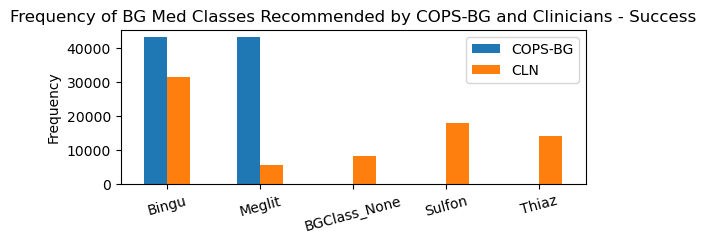


---BG---
med_cops:  {'Bingu': 126267, 'Meglit': 126267}
med_cln:  {'BGClass_None': 24582, 'Bingu': 84195, 'Thiaz': 61089, 'Sulfon': 64976, 'Meglit': 12043}


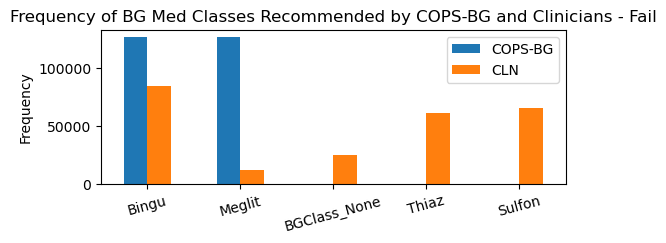

In [109]:
plot_med_list_2(bg_df_suc, 'BG', 'Success')
plot_med_list_2(bg_df_fail, 'BG', 'Fail')


---MM---
med_cops:  {'Diur': 23631, 'ACE': 25008, 'Bingu': 9929}
med_cln:  {'ACE': 15912, 'Diur': 16145, 'Bingu': 16683, 'Thiaz': 9476, 'BPBGClass_None': 1531}


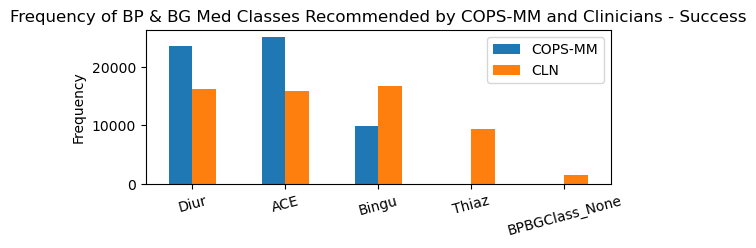


---MM---
med_cops:  {'Diur': 47931, 'ACE': 50445, 'Bingu': 22196}
med_cln:  {'ACE': 19290, 'Diur': 20270, 'Bingu': 30621, 'Thiaz': 23228, 'BPBGClass_None': 6868}


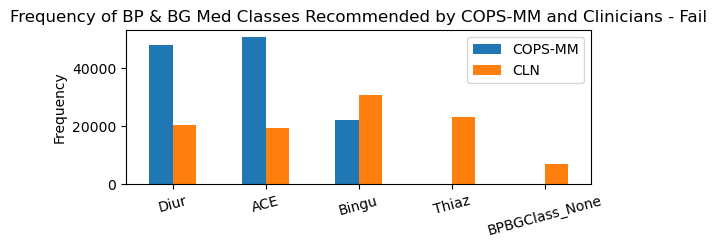

In [110]:
plot_med_list_2(bpbg_df_suc, 'MM', 'Success')
plot_med_list_2(bpbg_df_fail, 'MM', 'Fail')